## Question 2.11
In Sect. 2.7, an interpretation for a model with systematic component $μ = E[log(y)] = β_0 + β_1x$ was discussed.
1. Use a Taylor series expansion of $log(y)$ about $μ = E[y]$.
2. Find the expected value of both sides of this equation, and hence show that $E[log(y)] ≈ log(E[y]) = log(μ)$.
3. Using this information, show that an increase in the value of $x$ by $1$ is associated (approximately) with a change in $μ$ by a factor of $exp(β_1)$.


### Answer to 2.11, 1
***Use a Taylor series expansion of  $log(y)$  about  $μ=E[y]$.***

We already saw how to do Taylor expansion in the previous question.  So let's plug-and-chug.

NOTE that we'll use the natural log, so I'll give my answers in terms of $ln$ instead of $log$.

> $f(y) = ln(y) = f(\mu) + f'(\mu)(y - \mu) + f''(\mu)(y - \mu)^2 + ...$

> $= ln(\mu) + \frac{1}{\mu}(y - \mu) - \frac{1}{2\mu^2}(y - \mu)^2 + ...$

### Answer to 2.11, 2
***Find the expected value of both sides of this equation, and hence show that $E[log(y)] ≈ log(E[y]) = log(μ)$.***

We'll start by taking the expectation of each term.

> $E[ln(y)] = E[ln(\mu)] + E[\frac{1}{\mu}(y-\mu)] - E[\frac{1}{2\mu^2}(y-\mu)^2] + ...$

Since $\mu$ and $ln(\mu)$ are constants, we get

> $E[ln(y)] = ln(\mu) + \frac{1}{\mu}E[(y-\mu)] - \frac{1}{2\mu^2}E[(y-\mu)^2] + ...$

Interestingly, $E[(y-\mu)]=0$ and $E[(y-\mu)^2] = var(y)$ such that we're left with

> $E[ln(y)] = ln(\mu) - \frac{1}{2\mu^2}var(y) + ...$

In other words,

> $E[ln(y)] \approx ln(\mu)$

which is what we're meant to show.

### Answer to 2.11, 3
***Using this information, show that an increase in the value of $x$ by $1$ is associated (approximately) with a change in $μ$ by a factor of $exp(β_1)$.***

Given that $E[ln(y)] \approx ln(\mu) \approx \beta_0 + \beta_1x$, a 1-unit increase in $x$ causes a $\beta_1$ change to $ln(\mu)$.  But we're meant to show the change to $\mu$ (not $ln(\mu)$).

To do this, we can inverse the natural log by exponentiating both sides of the equation.

> $e^{(ln(\mu))} = \mu = e^{(\beta_0 + \beta_1x)} = e^{\beta_0} \times e^{\beta_1x}$

So a one-unit increase in $x$ **multiplicatively** increases $\mu$ by a factor of $e^{\beta_1}$.  For instance, take $\mu_0$ to be $\mu$ when $x=2$ such that $\mu_0 = e^{\beta_0} \times e^{2\beta_1}$.  Now take $\mu_1$ to be $\mu$ when $x=3$ such that $\mu_1 = e^{\beta_0} \times e^{3\beta_1}$.  Then $\frac{\mu_1}{\mu_0} = \frac{e^{\beta_0} \times e^{3\beta_1}}{e^{\beta_0} \times e^{2\beta_1}} = e^{\beta_1}$

## Question 2.12
Using R, produce a vector of 30 random numbers $y$ from a standard normal distribution (use `rnorm()`). Generate a second vector of 30 random numbers $x$ from a standard normal distribution. Find the P-value for testing if the explanatory variable $x$ is significantly related to $y$ using the regression model `lm(y ~ x)`.

Repeat the process a large number of times, say 1000 times. What proportion of the P-values are less than 5%? Less than 10%? What is the lesson?

### Answer
To execute this we'll run the model through a for-loop.

In [ ]:
pvalues <- numeric(length=1000)

for(i in 1:1000){
  x <- rnorm(30)
  y <- rnorm(30)

  m <- lm(y ~ 0+x)

  pvalues[i] <- summary(m)$coef[,4]
}

Here's the important thing to understand here.  We know that there is no relationship between `x` and `y` BECAUSE WE MADE THE DATA SUCH THAT THEY ARE INDEPENDENT.  Having said that, How many p-values should we expect to be $\le 0.05$? $\le 0.10$?

To answer, remember what p-values represent, the probability of our null distribution generating data like that which we found.  So we should ~5% of our p-values to be $\le 0.05$ and 10% of our pvalues to be $\le 0.10$.  

[1] 0.055

[1] 0.115

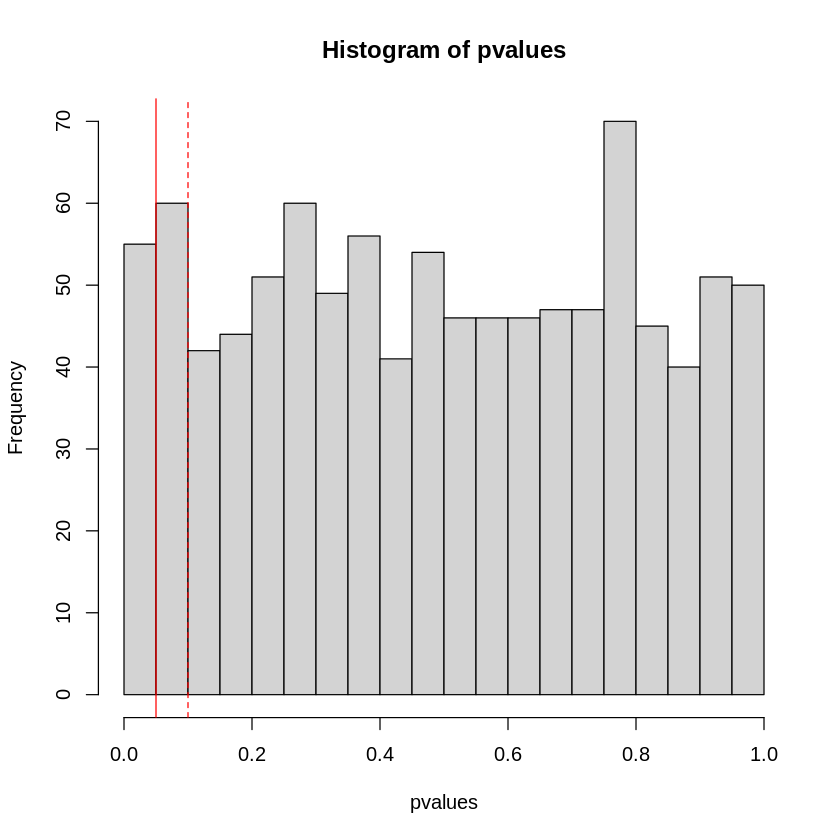

In [ ]:
hist(pvalues, breaks=20); abline(v=0.05, col="red"); abline(v=0.10, col="red", lty=2)

sum(pvalues < 0.05) / length(pvalues)
sum(pvalues < 0.10) / length(pvalues)

Indeed, this is what we find.  What's the lesson? I guess there's a few.  
1. For one null-hypothesis significance tests (NHST) do NOT test the experimental hypothesis but rather the null hypothesis.  
2. Rejected null hypotheses remain suspect.  To properly test a hypothesis, many controls must be in place, the result should be replicated several times, and test in several ways, and tested in different contexts (people, equipment, location, etc.).
3. A large number of NHSTs will lead to false rejections.

## Question 2.13
A study exposed sleeping people (males and females) of various ages to four different fire cues (a crackling noise, a shuffling noise, a flickering light, an unpleasant smell), and recorded the response time (in seconds) for the people to wake. Use the partially complete ANOVA table (Table 2.7) to answer the following questions.

1. Determine the degrees of freedom omitted from Table 2.7.
2. Determine how many observations were used in the analysis.
3. Find an unbiased estimate of $σ^2$.
4. Determine which explanatory variables are statistically significant for predicting response time, using sequential F-tests.
5. The analysed data are for participants who actually woke during the experiment; some failed to wake at all and were omitted from the analysis. Explain how this affects the interpretation of the results.
6. Compute the aic for the three nested models implied by Table 2.7. What model is suggested by the aic?
7. Compute the bic for the three nested models implied by Table 2.7. What model is suggested by the bic?
8. Compute $R^2$ and the adjusted $R^2$ for the three models implied by Table 2.7. What model is suggested by the $R^2$ and the adjusted $R^2$?
9. Compare the models suggested by the anova table, the aic, the bic, $R^2$ and the adjusted $R^2$. Comment.

\

**Table 2.7**

| Source of Variation | df | SS |
|---------------------|----|----|
| Cue | ? | 117,793|
| Sex | ? | 2,659 |
| Age | 3 | 22,850 |
| Residual | 60 | 177,639 |

### Answer to 2.13, 1
***Determine the degrees of freedom omitted from Table 2.7.***

We have 4 cues and 2 sexes.  Our basic equation for the degrees of freedom for a factor with $levels = l$ is $df = l-1$.  So here, $df_{cue} = 4-1=3$ and $df_{sex}=2-1=1$.

### Answer to 2.13, 2
***Determine how many observations were used in the analysis.***

Now that we have our total df, 67, we can take advantage of the fact that $df_{total} = n-1$.  Hence, the total number of observations was $n=df_{total}+1 = 67+1 = 68$.

### Answer to 2.13, 3
***Find an unbiased estimate of $σ^2$.***

Our unbiased estimate of the $\sigma^2$, the residual variance, is $\hat{\sigma}^2 = \frac{SS_{residual}}{df_{residual}} = \frac{1777639}{60} = 2960.65$

### Answer to 2.13, 4
***Determine which explanatory variables are statistically significant for predicting response time, using sequential F-tests.***

I don't really like this question.  The output of sequential F-tests varies with the sequence in which you test the factors; test $\text{Sex}$ first and you get one answer, test it second and get a different answer.  Without some information about how these variables relate, i.e., which should be controlled for when testing, there are too many possible tests from which to make sense.  So I'll just run calculate the F for each variable.

| Source of Variation | df | SS | MS | F | p |
|---------------------|----|----|----|---|---|
| Cue | 3 | 117,793 | 39,264.33 | 4.42 | 0.01 |
| Sex | 1 | 2,659 | 2,659 | 0.90 | 0.35 |
| Age | 3 | 22,850 | 7616.67 | 2.57 | 0.06 |
| Residual | 60 | 177,639 | 2,960.65 | NA | NA |

### Answer to 2.13, 5
***The analysed data are for participants who actually woke during the experiment; some failed to wake at all and were omitted from the analysis. Explain how this affects the interpretation of the results.***

At least, this limits the applicability of the findings; those that awoke may differ from those that did not.  We might call this a "bias".  Rather than speaking to something like the probabilities of certain outcomes, then, it can only speak to something like the *conditional* probabilities of certain outcomes; e.g., *conditional on waking up...*.

### Answer to 2.13, 6
***Compute the aic for the three nested models implied by Table 2.7. What model is suggested by the aic?***

To start, we should acknowledge that the book seemingly advocates ANOVA for comparing nested models but AIC/BIC for non-nested models.  However, as this question suggests, I don't think there is any reason that AIC cannot also be used for comparing nested models.

Equation 2.35 gives us the formula aic:

$$AIC = n \ \text{ln}(\text{RSS}/n) + 2p'$$

I think that the implied "three nested models" are $\text{(Cue)} < \text{(Cue + Sex)} < \text{(Cue + Sex + Age)}$.  Let's first find $\text{AIC}_{\text{(Cue+Sex+Age)}}$

$$\text{AIC}_{\text{(Cue+Sex+Age)}} = 68 \ \text{ln}\left(\frac{177,639}{68}\right) + 2(4) \approx 543$$
$$\text{AIC}_{\text{(Cue+Sex)}} = 68 \ \text{ln}\left(\frac{177,639 + 22,850}{68}\right) + 2(3) \approx 549$$
$$\text{AIC}_{\text{(Cue)}} = 68 \ \text{ln}\left(\frac{177,639 + 22,850 + 2,659}{68}\right) + 2(2) \approx 548$$
$$\text{AIC}_{\text{(intercept)}} = 68 \ \text{ln}\left(\frac{177,639 + 22,850 + 2,659 + 117,793}{68}\right) + 2(1) \approx 577$$

So the "intercept-only" model does the worst, but the other 3 models are pretty similar.

In [ ]:
68 * log(177639 / 68) + 8
68 * log((177639 + 22850) / 68) + 6
68 * log((177639 + 22850 + 2659) / 68) + 4
68 * log((177639 + 22850 + 2659 + 117793) / 68) + 2

[1] 543.0241

[1] 549.2525

[1] 548.1484

[1] 577.2463

### Answer to 2.13, 7
***Compute the bic for the three nested models implied by Table 2.7. What model is suggested by the bic?***

Recall that BIC is an alternative to AIC.  Its formula is given in Equation 2.36:

$$BIC = n \ \text{ln}(\text{RSS}/n) + p' \text{ln} \ n$$

$$BIC_{Cue + Sex + Age} = 68 \ \text{ln} \ \left(\frac{177,639}{68}\right) + 4 \ \text{ln}(68) \approx 552$$

$$BIC_{Cue + Sex} = 68 \ \text{ln} \ \left(\frac{177,639 + 22,850}{68}\right) + 3 \ \text{ln}(68) \approx 556$$

$$BIC_{Cue} = 68 \ \text{ln} \ \left(\frac{177,639 + 22,850 + 2,659}{68}\right) + 2 \ \text{ln}(68) \approx 553$$

$$BIC_{(intercept)} = 68 \ \text{ln} \ \left(\frac{177,639 + 22,850 + 2,659 + 117,793}{68}\right) + 1 \ \text{ln}(68) \approx 579$$

Once again, the models are pretty similar, but the "intercept-only" model seems appreciably worse than any of the others.  Technically, the $Cue + Sex + Age$ model is best.

In [ ]:
68 * log((177639) / 68) + 4*log(68)
68 * log((177639 + 22850) / 68) + 3*log(68)
68 * log((177639 + 22850 + 2659) / 68) + 2*log(68)
68 * log((177639 + 22850 + 2659 + 117793) / 68) + 1*log(68)

[1] 551.9021

[1] 555.911

[1] 552.5874

[1] 579.4658

### Answer to 2.13, 8
***Compute $R^2$ and the adjusted $R^2$ for the three models implied by Table 2.7. What model is suggested by the $R^2$ and the adjusted $\bar{R}^2$?***

Let's recall the equations for $R^2$ and $\bar{R}^2$; by equations (2.29) and (2.30):
$$R^2 = \frac{\text{ssReg}}{SST} = 1 - \frac{RSS}{SST}$$
\
$$\bar{R}^2 = 1 - \frac{RSS/(n-p')}{SST/(n-1)} = 1 - (1 - R^2) \frac{n-1}{n-p'}$$
\
\
$$R^2_{Cue+Sex+Age} = 1 - \frac{177,639}{177,639 + 22,850 + 2659 + 117,793} \approx 0.45$$
\
$$\bar{R}^2_{Cue+Sex+Age} = 1 - \frac{177,639 / (68 - 4)}{(177,639 + 22,850 + 2659 + 117,793) / (68 - 1)} \approx 0.42$$
\
\
$$R^2_{Cue+Sex} = 1 - \frac{177,639 + 117,793}{177,639 + 22,850 + 2659 + 117,793} \approx 0.08$$
\
$$\bar{R}^2_{Cue+Sex} = 1 - \frac{(177,639 + 117,793) / (68 - 3)}{(177,639 + 22,850 + 2659 + 117,793) / (68 - 1)} \approx 0.05$$
\
\
$$R^2_{Cue} = 1 - \frac{177,639 + 117,793 + 2659}{177,639 + 22,850 + 2659 + 117,793} \approx 0.07$$
\
$$\bar{R}^2_{Cue} = 1 - \frac{(177,639 + 117,793 + 2659) / (68 - 2)}{(177,639 + 22,850 + 2659 + 117,793) / (68 - 1)} \approx 0.06$$

Both metrics tell about the same: the full model is most explanatory and the others explain similar limited amounts of variance.

In [ ]:
1 - (177639)/ ((177639 + 22850 + 2659 + 117793))
1 - ((177639) / (68-4)) / ((177639 + 22850 + 2659 + 117793) / (68-1))

1 - (177639 + 117793)/ ((177639 + 22850 + 2659 + 117793))
1 - ((177639 + 117793) / (68-3)) / ((177639 + 22850 + 2659 + 117793) / (68-1))

1 - (177639 + 117793 + 2659)/ ((177639 + 22850 + 2659 + 117793))
1 - ((177639 + 117793 + 2659) / (68-2)) / ((177639 + 22850 + 2659 + 117793) / (68-1))

[1] 0.4465057

[1] 0.4205607

[1] 0.0794819

[1] 0.05115826

[1] 0.07119689

[1] 0.05712411

### Answer to 2.13, 9
***Compare the models suggested by the anova table, the aic, the bic, $R^2$ and the adjusted $R^2$. Comment.***

Across each model-comparison technique, the full model performed best.  However, the methods differed in their relative ranking of the remaining incomplete models: aic and bic show that the 3 models perform similarly well, while $R^2$ and $\bar{R}^2$ appear to suggest a large difference between the full model and either incomplete model.

## Question 2.14

Numerous studies have shown an association between seasonal ambient temperature (in ◦C) and blood pressure (in mm Hg). A study of 574 rural Ghanaian men aged between 18 and 65 studied this relationship [9] (and also included a number of extraneous variables) using a linear regression model, producing the results in Table 2.8.

**Table 2.8 The parameter estimates and the standard errors in the linear regression model for estimating the systolic blood pressure (in mm Hg) in Ghanaian men aged between 18 and 65 (Problem 2.14)**

|Explanatory variable|$\hat{\beta}_j$|se($\hat{\beta}_j$)|
|--------------------|---------------|-------------------|
|Constant|100.812|13.096|
|Age(in years|0.332|0.062|
|Waist circumference (in cm)|0.411|0.090|
|Alcohol (yes:1; no:0)|-3.003|1.758|
|Smoking (yes:1; no:0)|-0.362|2.732|
|Ambient temperature (in ◦C)|-0.521|0.262|


1. Compute the P-values for each term in the model, and comment.

2. After adjusting for age, waist circumference, alcohol consumption and smoking habits, describe the relationship between ambient temperature and systolic blood pressure.

3. Plot the line describing the relationship between ambient temperature and systolic blood pressure for 30-year-old men who do not smoke, do drink alcohol and have a waist circumference of 100 cm. The authors state that

>> Daily mean temperatures range between an average minimum of 20◦C in the rainy season and an average maximum of 40◦C in the dry season. In the dry season, early mornings are usually cool and the afternoons commonly hot with daily maximum temperatures going as high as 45◦C (p. 17).

>Use this information to guide your choice of temperature values for your plot.

4. Compute a 95% confidence interval for the regression parameter for ambient temperature.

5. Interpret the relationship between ambient temperature and all the variables in the regression equation.

6. Predict the mean systolic blood pressure for 35 year-old Ghanaian men (who do not smoke, do drink alcohol and have a waist circumference of 100 cm) when the ambient temperature is 30◦C.

### Answer to 2.14, 1
***Compute the P-values for each term in the model, and comment.***

To find the p-values for these $\hat{\beta}$ estimates, we'll find the T-statistics like
$$T = \frac{\hat{\beta} - \beta_0}{se(\hat{\beta})}$$;
if $H_0$ is true, then then $T \sim t(df=n-p', \mu=0, \sigma=se(\hat{\beta}))$, from which we estimate the p-value.

I'm going to start by loading our data into R so that the computer can do our calculations.

In [ ]:
d <- data.frame("Explanatory variable" = c("Constant", "Age", "Waist", "Alcohol", "Smoking", "Temp"),
                "beta" = c(100.812, 0.332, 0.411, -3.003, -0.362, -0.521),
                "se" = c(13.096, 0.062, 0.090, 1.758, 2.732, 0.262))

d

Explanatory.variable,beta,se
<chr>,<dbl>,<dbl>
Constant,100.812,13.096
Age,0.332,0.062
Waist,0.411,0.090
Alcohol,-3.003,1.758
Smoking,-0.362,2.732
Temp,-0.521,0.262


Now let's calulate the T-stat for each; I'm going to assume that $\beta_0 = 0$ in all cases.

In [ ]:
d$T.stat <- round(d$beta / d$se, 4)
d

Explanatory.variable,beta,se,T.stat
<chr>,<dbl>,<dbl>,<dbl>
Constant,100.812,13.096,7.6979
Age,0.332,0.062,5.3548
Waist,0.411,0.090,4.5667
Alcohol,-3.003,1.758,-1.7082
Smoking,-0.362,2.732,-0.1325
Temp,-0.521,0.262,-1.9885


We can just about calculate the p-values, but we the degrees of freedom.  Remember, this is $\nu = n-p'$.  Unfortunately, the question is a little vague.  We're told that $n=574$, and we're given 6 parameters; however, the question states that the analysis used "a number of extraneous variables".  I'm not sure if the "extraneous variables" are all those given to us, or if some were omitted from the table.  But I'll assume what we're given is the full set of variables; even if it wasn't, it's unlike to make much difference in our estimates.

In [ ]:
df <- 574 - 6

d$p.values <- round(2*(1-pt(abs(d$T.stat), df)),4)

d

Explanatory.variable,beta,se,T.stat,p.values
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Constant,100.812,13.096,7.6979,0.0000
Age,0.332,0.062,5.3548,0.0000
Waist,0.411,0.090,4.5667,0.0000
Alcohol,-3.003,1.758,-1.7082,0.0881
Smoking,-0.362,2.732,-0.1325,0.8946
Temp,-0.521,0.262,-1.9885,0.0472


### Answer to 2.14, 2
***After adjusting for age, waist circumference, alcohol consumption and smoking habits, describe the relationship between ambient temperature and systolic blood pressure.***

After accounting for other variables, systolic blood pressure is estimated to decrease by 0.521 mmHG for every 1 degree increase in ambient temperature.  The probability of the null distribution accounting for this relationship is 4.72%.

### Answer to 2.14, 3
***Plot the line describing the relationship between ambient temperature and systolic blood pressure for 30-year-old men who do not smoke, do drink alcohol and have a waist circumference of 100 cm. The authors state that***

>> ***Daily mean temperatures range between an average minimum of 20◦C in the rainy season and an average maximum of 40◦C in the dry season. In the dry season, early mornings are usually cool and the afternoons commonly hot with daily maximum temperatures going as high as 45◦C (p. 17).***

>***Use this information to guide your choice of temperature values for your plot.***

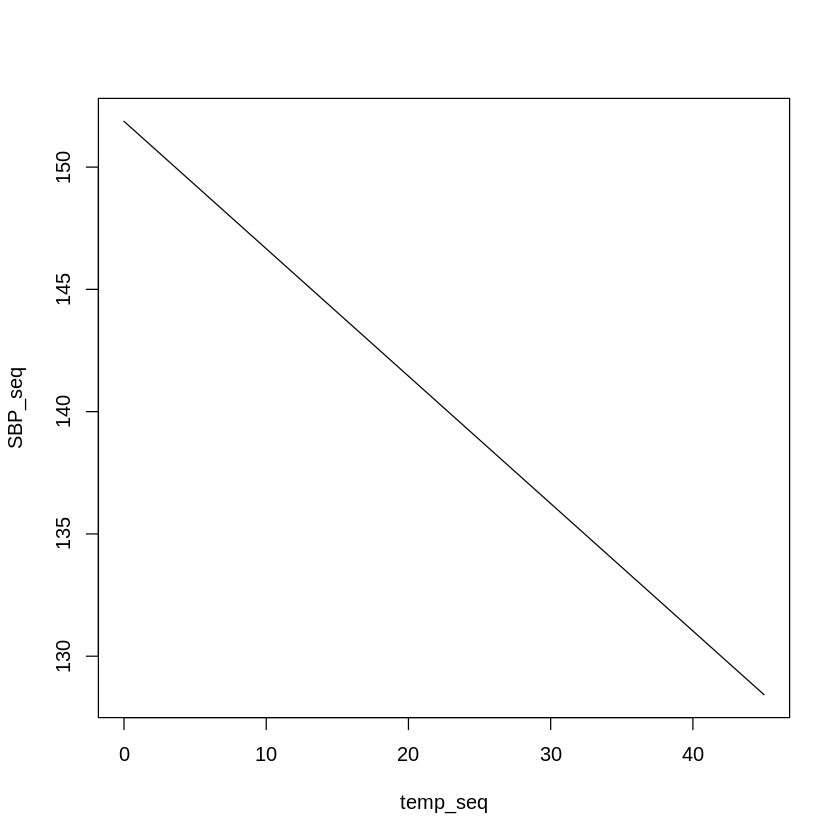

In [ ]:
# Start by assigning the case values
d$Case <- c(1, 30, 100, 0, 0, NA)
# Since we're trying to see the effect of temperature, define the set of temperatures
temp_seq <- seq(from=0, to=45, by=1)

# The SBP for each temperature is defined as the sum of products of each beta coef with its case value;
# since we're varying temperature, we add its contributions separate so we can use every value of temp_seq
SBP_seq <- (sum((d$beta * d$Case), na.rm=TRUE) + d[6, "beta"]*temp_seq)

plot(SBP_seq ~ temp_seq, type="l")

### Answer to 2.14, 4
***Compute a 95% confidence interval for the regression parameter for ambient temperature.***

In [ ]:
ci <- 0.95
a <- 1 - ci
a2 <- a/2
t_val <- qt(1-a2, df=df)

d$lo_ci <- round(d$beta - t_val*d$se, 2)
d$hi_ci <- round(d$beta + t_val*d$se, 2)

d

Explanatory.variable,beta,se,T.stat,p.values,Case,lo_ci,hi_ci
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Constant,100.812,13.096,7.6979,0.0000,1,75.09,126.53
Age,0.332,0.062,5.3548,0.0000,30,0.21,0.45
Waist,0.411,0.090,4.5667,0.0000,100,0.23,0.59
Alcohol,-3.003,1.758,-1.7082,0.0881,0,-6.46,0.45
Smoking,-0.362,2.732,-0.1325,0.8946,0,-5.73,5.00
Temp,-0.521,0.262,-1.9885,0.0472,NA,-1.04,-0.01


### Answer to 2.14, 5
***Interpret the relationship between ambient temperature and all the variables in the regression equation.***

I'm not sure if this question was the intended question: we're asked to interpret the relationships between one *predictor* variable (Temp) with all other predictor variables; I would've thought the question wanted the relationship with the *outcome* variable (blood pressure) will each predictor variable.  But let's take the question at face value.

**After accounting for the other predictor variables**, blood pressure decreases by 0.521 $\pm$ 0.262 mmHg for every $1°$ increase in ambient temperature.

I take the bolded bit to be addressing the question.

### Answer to 2.14, 6
***Predict the mean systolic blood pressure for 35 year-old Ghanaian men (who do not smoke, do drink alcohol and have a waist circumference of 100 cm) when the ambient temperature is 30◦C.***

This will be similar to part 3.  We'll just insert each of these values into our regression equation

$$BP = \beta_0 + \beta_{\text{age}}\text{Age} + ... + \beta_{\text{Temp}}\text{Temp}$$

In [ ]:
case2 <- c(1, # contant
           35, # age
           100, # waist circumference
           0, # alcohol
           0, # smoking
           30) # temperature

sum(case2 * d$beta)

[1] 137.902

## Question 2.15
An experiment was conducted [11] to determine how to maximize Mermaid meadowfoam flower production (Table 2.9; data set: flowers) for extraction as vegetable oil.

**Table 2.9** *The average number of flowers per meadowfoam plant (based on ten seedlings) exposed to various levels of lighting at two different times: at photoperiodic floral induction (PFI) or 24 days before PFI. These data are consistent with the results in [11]*

\

| Timing  | LI|       |       |       |       |       |       |
|---------|------------------------------------------------------------------|-------|-------|-------|-------|-------|-------|
|         | 150   | 300   | 450   | 600   | 750   | 900   |
| At PFI  | 62.4  | 77.1  | 55.7  | 54.2  | 49.5  | 62.0  | 39.3  | 45.3  | 30.9  | 45.2  | 36.8  | 42.2  |
| Before PFI | 77.7  | 75.4  | 68.9  | 78.2  | 57.2  | 70.9  | 62.9  | 52.1  | 60.2  | 45.6  | 52.5  | 44.1  |

*LI* stands for "Light intensity (in $\mu \text{mol} m^{-2} s^{-1}$)

\
1. Plot the average number of flowers produced per plant against the light intensity, distinguishing the two timings. Comment.
2. Suppose a model with the systematic component `Flowers ~ Light + Timing` was needed to model the data. What would such a systematic component imply about the relationship between the variables?
3. Suppose a model with the systematic component `Flowers ~ Light * Timing` was needed to model the data. What would such a systematic component imply about the relationship between the variables?
4. Fit the two linear regression models with the systematic components specified above. Which is the preferred model?
5. The fitted model should use all prior weights as $w_i = 10$ for all $i$. What difference does it make if the prior weights are not defined (which r interprets as $w_i = 1$ for all $i$)?
6. Plot the systematic component of the preferred regression model on the data.
7. Interpret the model.

*(This problem continues in Problem 3.13.)*

### Answers
Let's start by getting our data loaded.

In [ ]:
install.packages("GLMsData")
library(GLMsData)

data(flowers)
d <- flowers
str(d)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



'data.frame':	24 obs. of  3 variables:
 $ Flowers: num  62.4 77.1 77.7 75.4 55.7 54.2 68.9 78.2 49.5 62 ...
 $ Light  : int  150 150 150 150 300 300 300 300 450 450 ...
 $ Timing : Factor w/ 2 levels "Before","PFI": 2 2 1 1 2 2 1 1 2 2 ...


#### Answer to 2.15, 1
***Plot the average number of flowers produced per plant against the light intensity, distinguishing the two timings. Comment.***

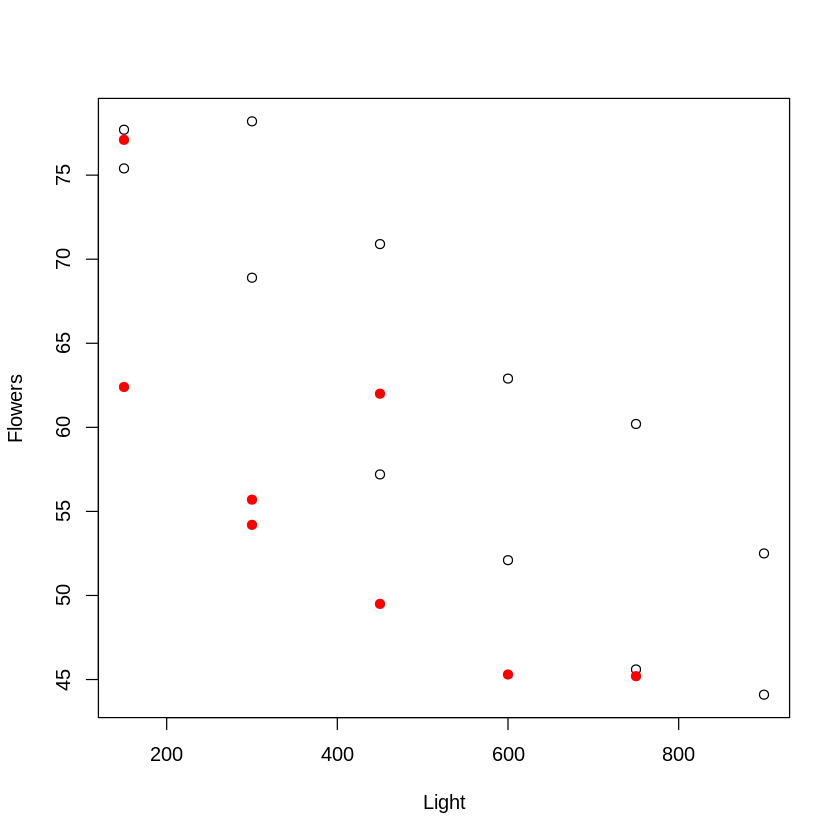

In [ ]:
plot(Flowers ~ Light, data=d[d$Timing=="Before",])
points(Flowers ~ Light, data=d[d$Timing=="PFI",], col="red", pch=19)

For both `Timing` conditions, `Flowers` decrease with more `Light`.  Fewer `Flowers` occur across all values of `Light` for the `Timing == 'PFI'` condition compared to the `Timing == "Before"` condition.

#### Answers to 2.15, 2 and 3
***2. Suppose a model with the systematic component `Flowers ~ Light + Timing` was needed to model the data. What would such a systematic component imply about the relationship between the variables?***

***3. Suppose a model with the systematic component `Flowers ~ Light * Timing` was needed to model the data. What would such a systematic component imply about the relationship between the variables?***

The model `Flowers ~ Light + Timing` would imply that the variable $Flowers$ is well modeled by the additive relations with $Light$ and $Timing$.

The model `Flowers ~ Light * Timing` can be a little misleading if you're not familiar with R notation.  You might think that this model translates to $Flowers$ being modeled as the interaction between $Light$ and $Timing$.  But in R, the `*` symbol implies both non-interaction relations and interactions like
$$Flowers = \alpha + \beta_L Light + \beta_T Timing + \beta_{LT} \times Light \times Timing$$
So this model implies that $Flowers$ can be well modeled by the additive relations with $Light$, $Timing$, and the interaction of $Light$ and $Timing$.

#### Answer to 2.15, 4
***Fit the two linear regression models with the systematic components specified above. Which is the preferred model?***

As a guess from looking at the plot in part 1, I think the first model (without interaction) will be preferred.  Why? Because the two timing conditions look to have the same slope but different intercepts--meaning that the interaction is unimportant.  But let's see.

In [ ]:
m1 <- lm(Flowers ~ Light + Timing, data=d)
m2 <- lm(Flowers ~ Light * Timing, data=d)

summary(m1)
summary(m2)

AIC(m1)
AIC(m2)


Call:
lm(formula = Flowers ~ Light + Timing, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.040  -3.930  -1.819   5.587  11.866 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  83.399167   3.289525  25.353  < 2e-16 ***
Light        -0.040490   0.005157  -7.851 1.11e-07 ***
TimingPFI   -12.091667   2.642210  -4.576 0.000164 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.472 on 21 degrees of freedom
Multiple R-squared:  0.7973,	Adjusted R-squared:  0.778 
F-statistic: 41.29 on 2 and 21 DF,  p-value: 5.279e-08



Call:
lm(formula = Flowers ~ Light * Timing, data = d)

Residuals:
   Min     1Q Median     3Q    Max 
-9.919 -3.991 -1.698  5.446 11.664 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      83.116667   4.364515  19.044 2.75e-14 ***
Light            -0.039952   0.007471  -5.347 3.11e-05 ***
TimingPFI       -11.526667   6.172356  -1.867   0.0766 .  
Light:TimingPFI  -0.001076   0.010566  -0.102   0.9199    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.63 on 20 degrees of freedom
Multiple R-squared:  0.7974,	Adjusted R-squared:  0.767 
F-statistic: 26.24 on 3 and 20 DF,  p-value: 3.898e-07


[1] 162.5441

[1] 164.5316

Indeed, the interaction term in `m2` is basically 0 with a very high p-value--suggesting that it is unimportant.  Using `AIC`, `m1` is apparently preferred over `m2`.

#### Answer to 2.15, 5
***The fitted model should use all prior weights as $w_i = 10$ for all $i$. What difference does it make if the prior weights are not defined (which r interprets as $w_i = 1$ for all $i$)?***

Wha!? where are these "prior weights" coming from?  Well, you'd have to read the information file on the `flowers` data.frame()

In [ ]:
?flowers

It says: "`Flowers` the mean number of flowers per meadowfoam plant,
          averaged over ten seedlings; a numeric vector".

So let's run the `m1` regression with and without weights.

In [ ]:
m1w <- lm(Flowers ~ Light + Timing, data=d, weights = rep(10, nrow(d)))

summary(m1)
summary(m1w)


Call:
lm(formula = Flowers ~ Light + Timing, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.040  -3.930  -1.819   5.587  11.866 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  83.399167   3.289525  25.353  < 2e-16 ***
Light        -0.040490   0.005157  -7.851 1.11e-07 ***
TimingPFI   -12.091667   2.642210  -4.576 0.000164 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.472 on 21 degrees of freedom
Multiple R-squared:  0.7973,	Adjusted R-squared:  0.778 
F-statistic: 41.29 on 2 and 21 DF,  p-value: 5.279e-08



Call:
lm(formula = Flowers ~ Light + Timing, data = d, weights = rep(10, 
    nrow(d)))

Residuals:
    Min      1Q  Median      3Q     Max 
-31.748 -12.428  -5.753  17.668  37.524 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  83.399167   3.289525  25.353  < 2e-16 ***
Light        -0.040490   0.005157  -7.851 1.11e-07 ***
TimingPFI   -12.091667   2.642210  -4.576 0.000164 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20.47 on 21 degrees of freedom
Multiple R-squared:  0.7973,	Adjusted R-squared:  0.778 
F-statistic: 41.29 on 2 and 21 DF,  p-value: 5.279e-08


No differences.

#### Answer to 2.15, 6
***Plot the systematic component of the preferred regression model on the data.***

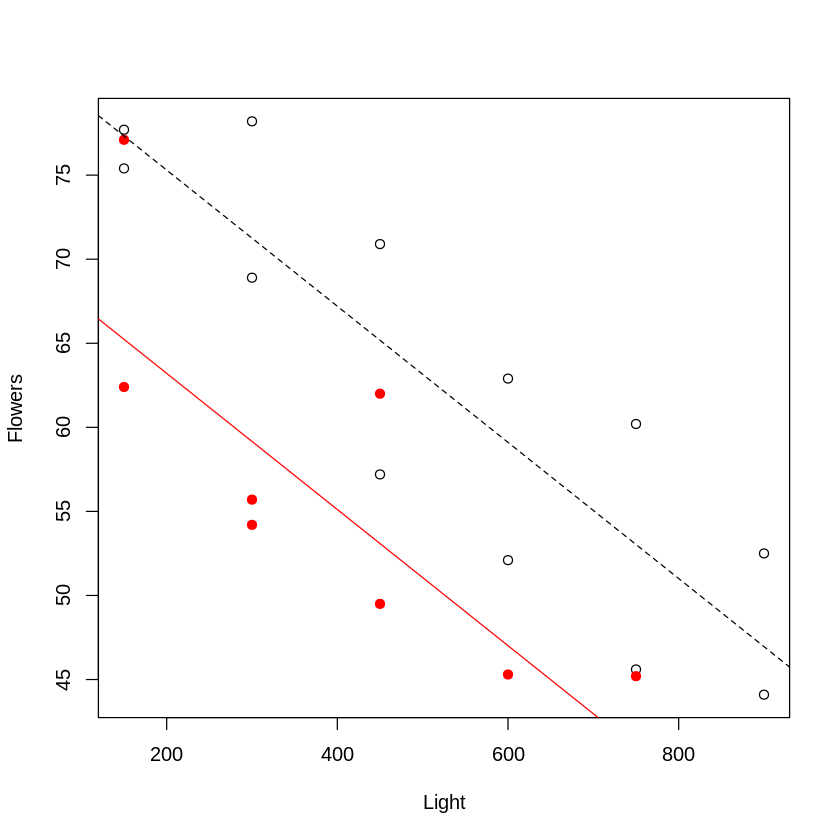

In [ ]:
plot(Flowers ~ Light, data=d[d$Timing=="Before",])
points(Flowers ~ Light, data=d[d$Timing=="PFI",], col="red", pch=19)
abline(coef(m1)[1], coef(m1)[2], lty=2, col="black")
abline(sum(coef(m1)[c(1, 3)]), coef(m1)[2], lty=1, col="red")

#### Answer to 2.15, 7
***Interpret the model.***

Under either lighting condition, `Flowers` decreases with `Light` at approximately the same rate.  `Timing` also affect `Flowers`; `Timing == "RFI` generally suppresses `Flowers` compared to `Before`.